<a href="https://colab.research.google.com/github/Edward-TL/covid/blob/master/analisis_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Start

¡Hola! Gracias por entrar, ¿ya te serviste tu tacita de café? Si no, te gusta el café, igual puedes hacerte un tecito o servirte una cerveza (Not judging). Al fin y al cabo, vivimos una pandemia y yo solo busco entretenerte un rato. Sin más por el momento, empezamos.

En México, hemos pasado del día 150 de "encierro" (como dato por parte del Gobierno de México, la cuarentena no es obligatoria a la fecha). Han muerto familiares, han muerto conocidos que estimaba y quería mucho y, desde lo personal, no veo el final de esto antes de que llegue la vacuna, al menos en mi país. Conflictos internos abundan bastante, y he dejado de pensar hasta cuándo podré salir, en que momento mis amigos y conocidos con negocios podrán respirar de este mar de deudas acumuladas.

Lo que me brinda esperanza de que la vida como la conocimos, regresará, son las noticias dónde en otros países la gente ya puede salir a conciertos (China), o dónde las fiestas masivas ya son permitidas (Inglaterra). Veo que en España, el cantante Miguel Bosé, llama a una marcha (pacífica) para no usar los cubrebocas (mascarillas para los españoles), cosa que era impensable hace unas semanas debido al encierro estricto por orden de su gobierno. No apoyo la idea, pero me sorprende el hecho de que la gente ya se puede reunir.

En estos días, decidí tomar cursos en Platzi, una plataforma con clases en línea que me han permitido hacer este y otros post dentro de Kaggle. Pasé de trabarme al diseñar una macro en excel, a diseñar todas las herramientas que verás a continuación; de no saber que era Python a usar Pandas y Notebooks en mi día cotidiano; de temer al OpenSource (por ignorante), a querer aportarles Datasets.

Gracias a la mentoría de mi coach en Platzi Master (por que algunos sueños, sí se pueden hacer realidad) y a su decisión de ponerme este reto, llegue a este Dataset, pensando que iba a ser de ejemplo y me encuentro con información actualizada. Así que, les invito a que se tomen su tacita de café y me acompañen a ver lo que descubrí.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import

In [2]:
#For the system
import os

#Manage of time
from datetime import datetime, timedelta

#Manage of files
import pandas as pd
import csv
import numpy as np

#Graph tools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#Gauss-Jordan
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Loading Info

In [4]:
%cd 'drive/My Drive/Colab Notebooks/COVID/Data'
!ls

/content/drive/My Drive/Colab Notebooks/COVID/Data
'countries and subregions.csv'	      time_series_covid_19_confirmed_US.csv
 covid_19_data.csv		      time_series_covid_19_deaths.csv
 COVID19_line_list_data.csv	      time_series_covid_19_deaths_US.csv
 COVID19_open_line_list.csv	      time_series_covid_19_recovered.csv
 time_series_covid_19_confirmed.csv   total_counter.csv


In [5]:
df = pd.read_csv('covid_19_data.csv')
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

#Df edition

In [6]:
df = df[['ObservationDate',
         'Country/Region',
         'Confirmed',
         'Deaths',
         'Recovered']]

In [7]:
colors = [u'#348ABD', u'#A60628', u'#7A68A6', u'#467821', u'#D55E00', u'#CC79A7', u'#56B4E9', u'#009E73', u'#F0E442', u'#0072B2']
names = ['blue', 'red', 'purple', 'green', 'orange', 'pink', 'light_blue', 'intense_green', 'pastel_yellow', 'dark_blue']

bmh_colors = dict(zip(names, colors))

In [8]:
y_df = ['Confirmed', 'Deaths', 'Recovered']
titles = ['COVID-19 Confirmed Cases by date', 'COVID-19 Deaths Cases by date', 'COVID-19 Recovered Cases by date']
colors = [bmh_colors['blue'], 'k', bmh_colors['green']]

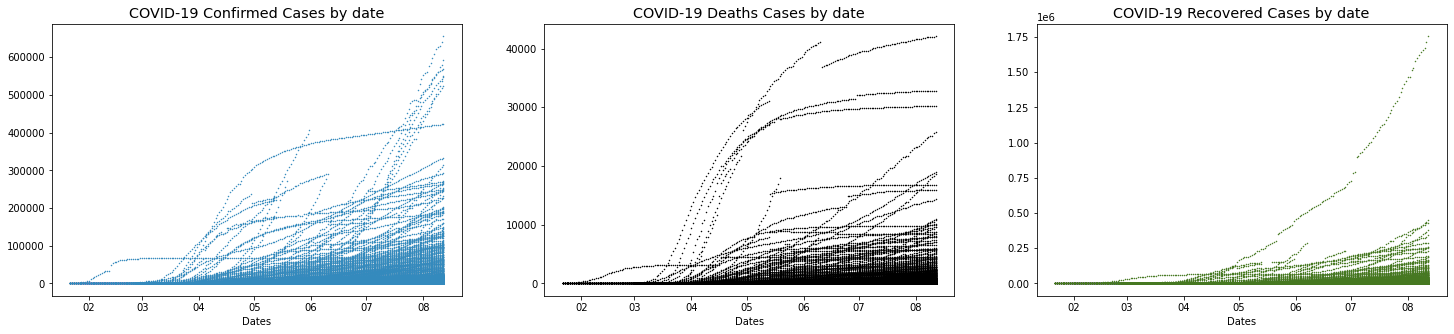

In [9]:
x = df['ObservationDate']
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,5), sharey=False, sharex=True)
n = 0
plt.style.use('ggplot')
    
for ax in fig.get_axes():
    ax.scatter(x, df[ y_df[n] ], s=1, c=colors[n])
    ax.set_title(titles[n])

    date_format = mdates.DateFormatter('%m')
    ax.set_xlabel('Dates')
    ax.xaxis.set_major_formatter(date_format)

    n = n + 1

plt.show()

#Total Sum

##Days Range

In [10]:
start_day = datetime(year=2020, month=1, day=22)
end_day = datetime(year=2020, month=8, day=12)
days = end_day - start_day
n_days = days.days

list_days = [start_day + timedelta(days=x) for x in range(n_days)]

In [11]:
dates = df['ObservationDate'].to_list()
confirmed = df['Confirmed'].to_list()
deaths = df['Deaths'].to_list()
recovered = df['Recovered'].to_list()
countries = df['Country/Region'].to_list()

In [12]:
sum_confirmed = [0] * (n_days)
sum_deaths = [0] * (n_days)
sum_recovered = [0] * (n_days)

day_subregion = [None] * (n_days)
day_continent = [None] * (n_days)

plus = 0
for d in range(len(list_days)):

    while dates[plus] == list_days[d] and (d + plus) < len(dates):
        '''---BY DAY---'''
        #General
        sum_confirmed[d] = int(sum_confirmed[d]) + int(confirmed[d + plus])
        sum_deaths[d] = int(sum_deaths[d]) + int(deaths[d + plus])
        sum_recovered[d] = int(sum_recovered[d]) + int(recovered[d + plus])
        
        plus += 1

# centered_sum = centered_len(len(str(sum_recovered[-2])))
# centered_date = centered_len(len("ObservationDate"))

# print(f'{centered_date("ObservationDate")} | {centered_sum("Confirmed")} | {centered_sum("Deaths")} | {centered_sum("Recovered")}')
# for d in range(len(list_days)):
#     print(f'{centered_date(datetime.strftime(list_days[d], "%Y-%m-%d"))} | {centered_sum(sum_confirmed[d])}  | {centered_sum(sum_deaths[d])} | {centered_sum(sum_recovered[d])}')

In [13]:
ys = [sum_confirmed, sum_deaths, sum_recovered]
titles = ['COVID-19 Confirmed Cases by date', 'COVID-19 Deaths Cases by date', 'COVID-19 Recovered Cases by date']
colors = [bmh_colors['blue'], 'k', bmh_colors['green']]

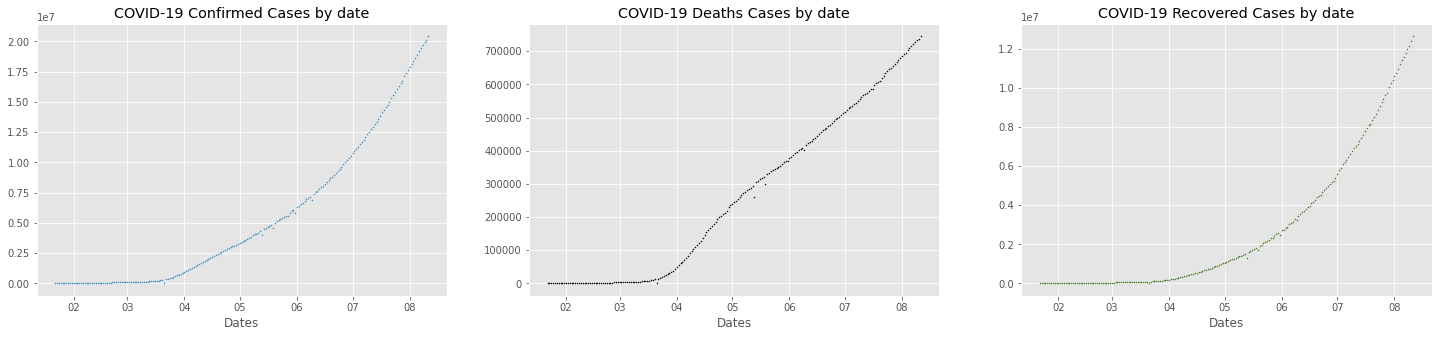

In [14]:
x = list_days
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,5), sharey=False, sharex=True)
plt.style.use('ggplot')
    
n = 0

for ax in fig.get_axes():
    ax.scatter(x, ys[n], s=1, color=colors[n])
    ax.set_title(titles[n])

    date_format = mdates.DateFormatter('%m')
    ax.set_xlabel('Dates')
    ax.xaxis.set_major_formatter(date_format)

    n = n + 1

plt.show()

#Predictions

##Linear regression

In [15]:
def estimate_b0_b1(x, y):
    n = np.size(x)

    #Obtain average of x and y
    mean_x, mean_y = np.mean(x), np.mean(y)

    #Calculate sumatory of XY and XX
    sum_xy = np.sum((x - mean_x)*(y - mean_y))
    sum_xx = np.sum((x*(x - mean_x)))

    #Regresion coeficents
    b_1 = sum_xy / sum_xx
    b_0 = mean_y - b_1*mean_x

    b = [b_0, b_1]

    return b

In [16]:
def linear_regression(x, y):
    if type(x[0]) == datetime:
        x = map(datetime.toordinal, x)
        x = list(x)

    b = estimate_b0_b1(x, y)

    y_pred = [b[0] + b[1]*x[x_i] for x_i in range(len(x))]

    #Graficación
    plot_regression(x, y,y_pred)

    print(b)
    print(f'Los valores de b0 = {b[0]}, b1 = {b[1]}')

In [17]:
def plot_regression(x, y, y_pred, x_labels=None, y_labels=None, titles=None):
    fig, ax = plt.subplots(figsize=(7,5))
    plt.style.use('ggplot')
    
    plt1 = ax.scatter(x, y, label='Data', color = 'g', marker='o', s=10)

    try:
        plt2 = sns.regplot(x, y_pred, label='Linear Regresion Model', 
                        scatter_kws={'s':1},
                        line_kws={"color":"r","alpha":0.3,"lw":10})
        
    except:
        plt.cla()
        plt1 = ax.scatter(x, y, label='Data', color = 'g', marker='o', s=10)
        plt3 = ax.plot(x, y_pred, label='Linear Regresion Model', color ='b')
        

    #X axis format
    date_format = mdates.DateFormatter('%m')
    ax.set_xlabel('Dates')
    ax.xaxis.set_major_formatter(date_format)

    #Labels
    if x_labels == None:
        ax.set_xlabel('2020 months')
    else:
        pass

    if y_labels == None:  
        ax.set_ylabel('Confirmed Cases / 10,000,000')
    else:
        pass

    if titles == None: 
        ax.set_title('COVID-19 Confirmed Cases')
    
    plt.legend()

    plt.show()

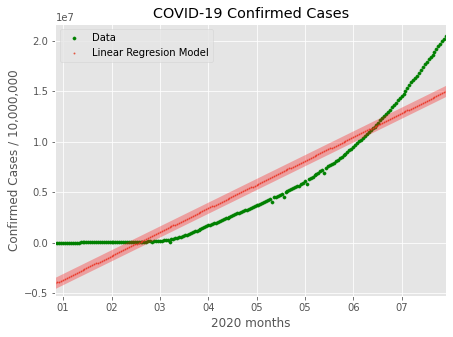

[-69347391742.14838, 94031.78868659106]
Los valores de b0 = -69347391742.14838, b1 = 94031.78868659106


In [18]:
x = list_days
y = ys[0]

linear_regression(x,y)

In [19]:
april_pos = 0
while list_days[april_pos].month < 4:
    april_pos += 1

april_pos

70

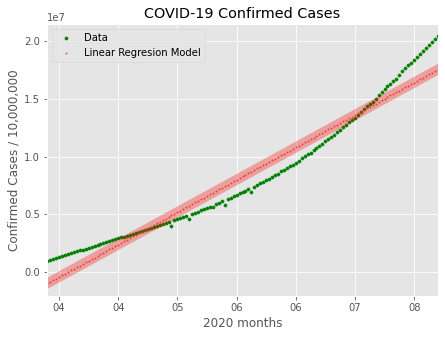

[-103642032009.7417, 140527.1586394752]
Los valores de b0 = -103642032009.7417, b1 = 140527.1586394752


In [20]:
x = list_days[70:]
y = ys[0][70:]

linear_regression(x,y)

##Exponencial Regression

In [21]:
def obtain_alpha_beta(x, y):
    #Iterables
    x_2 = [x[i]**2 for i in range(len(x))]
    log_y = [math.log(y[i], 10) for i in range(len(y))]
    x_log_y = [x[i]*log_y[i] for i in range(len(log_y))]
    n = len(x)

    #Summatories
    sum_x = sum(x)
    sum_x_2 = sum(x_2)

    sum_log_y = sum(log_y)
    sum_x_log_y = sum(x_log_y)

    #ALPHA

    #Matrix Solver
    #Numerador
    Mn_00_11_alpha = sum_log_y * sum_x_2
    Mn_01_10_alpha = sum_x_log_y * sum_x
    #Denominador
    Md_00_11 = n * sum_x_2
    Md_01_10 = sum_x * sum_x

    numerador_alpha = Mn_00_11_alpha - Mn_01_10_alpha
    denominador = Md_00_11 - Md_01_10
    log_alpha = numerador_alpha/denominador

    #BETHA
    #Numerador
    Mn_00_11_betha = n * sum_log_y
    Mn_01_10_betha = sum_x * sum_x_log_y

    numerador_betha = Mn_00_11_betha - Mn_01_10_betha
    log_betha = numerador_betha/denominador


    alpha = 10**log_alpha
    betha = 10**log_betha

    return alpha, betha, log_alpha, log_betha

In [22]:
def exponencial_regression(x, y):
    if type(x[0]) == datetime:
        ordinal_x = map(datetime.toordinal, x)
        ordinal_x = list(ordinal_x)
    else:
        ordinal_x = x

    alpha, betha, log_alpha, log_betha = obtain_alpha_beta(ordinal_x, y)

    y_pred = [alpha*betha**ordinal_x[x_i] for x_i in range(len(ordinal_x))]

    #Graficación
    plot_regression(x, y,y_pred)
    
    print(f'Los valores de log_alpha = {log_alpha}, log_betha = {log_betha}')
    print(f'Los valores de alpha = {alpha}, betha = {betha}')

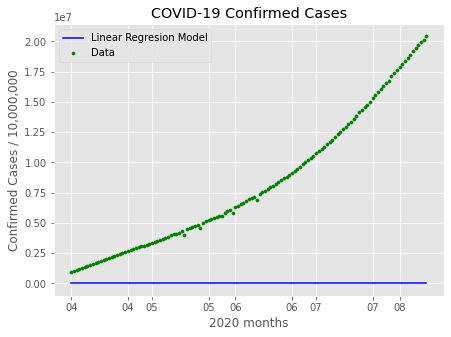

Los valores de log_alpha = -6510.678276474897, log_betha = -2509762462.2301803
Los valores de alpha = 0.0, betha = 0.0


In [23]:
x = list_days[70:]
y = ys[0][70:]

exponencial_regression(x,y)

##Polinomial regresion

In [24]:
def solve_for_m_2(x, y):
    if type(x[0]) == datetime:
        x = map(datetime.toordinal, x)
        x = list(x)

    #SUM X
    n = len(x)
    sum_x = sum(x)
    sum_x2 = sum([x[i]**2 for i in range(len(x))])
    sum_x3 = sum([x[i]**3 for i in range(len(x))])
    sum_x4 = sum([x[i]**4 for i in range(len(x))])

    #SUM Y
    sum_y = sum(y)
    sum_xy = sum([x[i]*y[i] for i in range(len(x))])
    sum_x2y = sum([x[i]**2*y[i] for i in range(len(x))])

    #Matrix row
    r1 = [n , sum_x, sum_x2]
    r2 = [sum_x, sum_x2, sum_x3]
    r3 = [sum_x2, sum_x3, sum_x4]

    A = np.matrix([r1, r2, r3], dtype='float')
    b = np.matrix([sum_y, sum_xy, sum_x2y], dtype='float').reshape(-1,1)
    
    A_prime = np.linalg.solve(A,b)

    return A_prime

In [25]:
def polinomial_regression(x, y):

    if type(x[0]) == datetime:
        x_m = [n for n in range(len(x))]
    else:
        x_m = x

    A_prime = solve_for_m_2(x_m, y)
    a0 = A_prime[0,0]
    a1 = A_prime[1,0]
    a2 = A_prime[2,0]

    y_pred_pol = [(a0 + a1*x_m[i] + a2*x_m[i]**2) for i in range(len(x_m))]

    #Graficación
    plot_pol_regression(x, y, y_pred_pol)

    # polinomial_solutions = f'''Solutions:
    # x0 = {a0}
    # x1 = {a1}
    # x2 = {a2}'''
    # print(polinomial_solutions)

In [26]:
def plot_pol_regression(x, y, y_pred, x_labels=None, y_labels=None, titles=None):
    
    fig, ax = plt.subplots(figsize=(7,5))
    plt.style.use('ggplot')
    
    data_sctr = ax.scatter(x, y, label='Data', color = 'g', marker='o', s=10)
    mdl_plt = ax.plot(x, y_pred, label='Model',marker='o', markersize=1 , color = 'r', alpha=0.2, linewidth=10)
    #X axis format
    date_format = mdates.DateFormatter('%m')
    ax.set_xlabel('Dates')
    ax.xaxis.set_major_formatter(date_format)

    #Labels
    if x_labels == None:
        ax.set_xlabel('2020 months')
    else:
        pass

    if y_labels == None:  
        ax.set_ylabel('Confirmed Cases / 10,000,000')
    else:
        pass

    if titles == None: 
        ax.set_title('COVID-19 Confirmed Cases')
    
    plt.legend()

    plt.show()

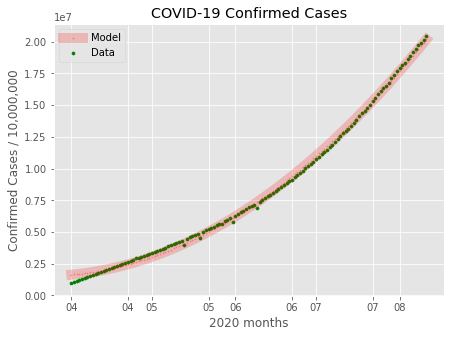

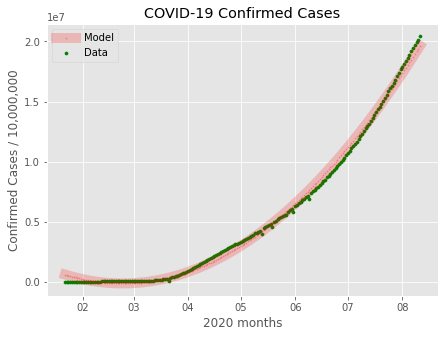

In [27]:
x = list_days[70:]
y = ys[0][70:]

polinomial_regression(x,y)

x = list_days
y = ys[0]

polinomial_regression(x,y)


##Polinomial prediction

In [28]:
from datetime import date
import calendar

year = end_day.year
month = end_day.month + 3
pred_month = calendar.month_name[month]

day = end_day.day

prediction_day = date(year, month, day)
start_day = date(year=2020, month=1, day=22)

prediction_days = prediction_day - start_day
n_prediction_days = prediction_days.days

list_days_pred = [start_day + timedelta(days=x) for x in range(n_prediction_days)]

In [29]:
def polinomial_prediction(x, y, x_prediction):

    x_m = [n for n in range(len(x))]
    # if type(x[0]) == datetime:
    #     x = map(datetime.toordinal, x)
    #     x = list(x)
    # else:
    #     x = x

    A_prime = solve_for_m_2(x_m, y)
    a0 = A_prime[0,0]
    a1 = A_prime[1,0]
    a2 = A_prime[2,0]

    # a2 = 687.07
    # a1 = -60000000
    # a0 = 1000000000000

    x_m_p = [n for n in range(len(x_prediction))]

    y_pred_pol = [(a0 + a1*x_m_p[i] + a2*x_m_p[i]**2) for i in range(len(x_m_p))]

    # polinomial_solutions = f'''Solutions:
    # x0 = {a0}
    # x1 = {a1}
    # x2 = {a2}'''
    # print(polinomial_solutions)

    return y_pred_pol

def plot_prediction(x, y, y_pred, x_pred, x_labels=None, y_labels=None, titles=None):
    
    fig, ax = plt.subplots(figsize=(10,6))

    mdl_plt = ax.plot(x_pred, y_pred, label='Model',marker='o', markersize=1 , color = 'r', alpha=0.2, linewidth=10)
    data_sctr = ax.scatter(x, y, label='Data', color = 'g', marker='o', s=10)

    #Labels
    ax.set_ylabel('Confirmed Cases / 10,000,000')
    ax.set_title('COVID-19 Confirmed Cases')
    
    pred_number = '{:,}'.format(int(y_pred[-1]))
    pred_date = datetime.strftime(x_pred[-1], '%d-%B-%Y')
    
    #X axis format
    txt = f'''2020 Months

Pronósitco: {pred_number}* Para el día: {pred_date}
*En caso de no haber una vacuna'''

    date_format = mdates.DateFormatter('%m')
    ax.xaxis.set_major_formatter(date_format)
    ax.set_xlabel(txt)
    
    # x_txt = x_pred[int(len(x_pred)/2)]
    # ax.text(x_txt, y_pred[-1], txt,
    #         horizontalalignment='center',
    #         verticalalignment='top',
    #         multialignment='center',
    #         bbox=dict(facecolor='white'))

    plt.legend(loc='best')

    plt.show()

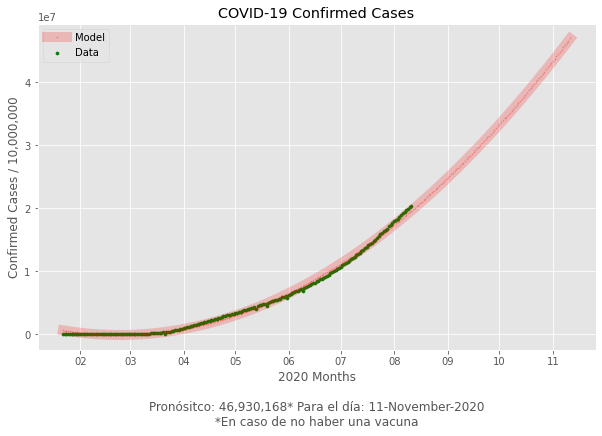

In [30]:
x = list_days
y = ys[0]

x_pred = list_days_pred
y_pred = polinomial_prediction(x, y, x_pred)

plot_prediction(x, y, y_pred, x_pred)

#Prediction for Cases, Deaths and Recovered

In [31]:
def plot_cases(x, ys, y_pred, x_pred, labels, colors, country=None):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,5), sharey=False, sharex=True)
    n = 0
    plt.style.use('ggplot')

    for ax in fig.get_axes():
        mdl_plt = ax.plot(x_pred, y_pred[n], label='Model',marker='o', markersize=1 , color = 'r', alpha=0.2, linewidth=10)
        data_sctr = ax.scatter(x, ys[n], label='Data', color = colors[n], marker='o', s=2)
        
        ax.set_ylabel(f'{labels[n]} Cases / 1e^n')
        if country == None:
            ax.set_title(f'COVID-19 {labels[n]} World Cases')
        else:
            ax.set_title(f'COVID-19 {labels[n]} {country} Cases ')

        pred_number = '{:,}'.format(int(y_pred[n][-1]))
        pred_date = datetime.strftime(x_pred[-1], '%d-%B-%Y')

        if country == None:
            txt = f'''2020 Months

    World Prediction: {pred_number}* {labels[n]} at: {pred_date}
    *In case there is no vaccine'''

        else:
            txt = f'''2020 Months

    {country} Prediction: {pred_number}* {labels[n]} at: {pred_date}
    *In case there is no vaccine'''

        date_format = mdates.DateFormatter('%m')
        ax.xaxis.set_major_formatter(date_format)
        ax.set_xlabel(txt)

        mdl_plt = mpatches.Patch(color='red', label='Model', alpha=0.2)
        ax.legend([mdl_plt, data_sctr], ['Model', 'Data'], loc='best')

        n = n + 1

    plt.show()

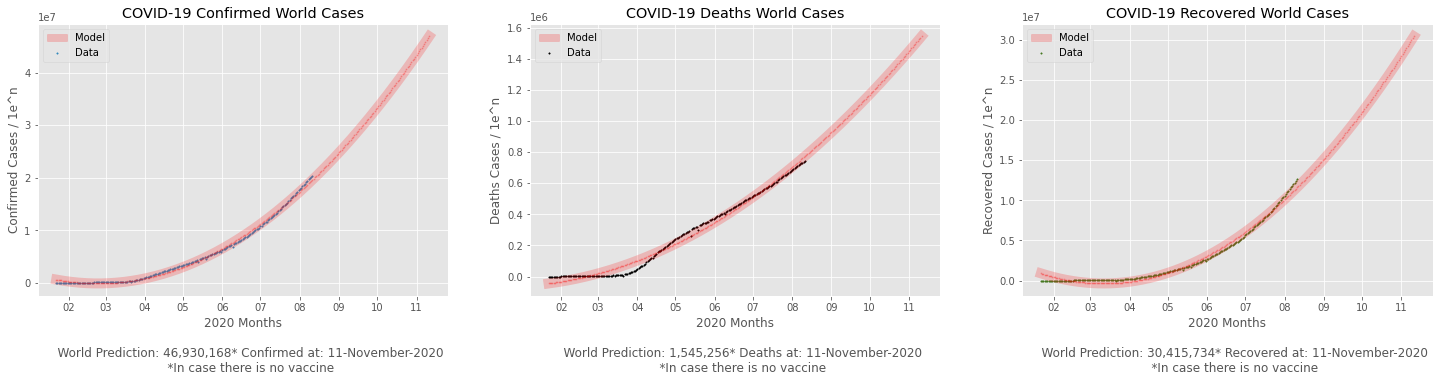

In [32]:
x = list_days
ys = [sum_confirmed, sum_deaths, sum_recovered]

x_pred = list_days_pred
y_pred = [polinomial_prediction(x, ys[n], x_pred) for n in range(len(ys))]

labels = ['Confirmed', 'Deaths', 'Recovered']

plot_cases(x, ys, y_pred, x_pred, labels, colors)

#Mexico

In [33]:
country = df['Country/Region'].to_list()

mx_confirmed = [0] * (n_days)
mx_deaths = [0] * (n_days)
mx_recovered = [0] * (n_days)

day_subregion = [None] * (n_days)
day_continent = [None] * (n_days)

plus = 0
for d in range(len(list_days)):

    while dates[plus] == list_days[d] and (d + plus) < len(dates):
        '''---BY DAY---'''
        #General
        if country[d + plus] == 'Mexico':
            mx_confirmed[d] = int(mx_confirmed[d]) + int(confirmed[d + plus])
            mx_deaths[d] = int(mx_deaths[d]) + int(deaths[d + plus])
            mx_recovered[d] = int(mx_recovered[d]) + int(recovered[d + plus])
        
        plus += 1
# centered_sum = centered_len(len(str(sum_recovered[-2])))
# centered_date = centered_len(len("ObservationDate"))

# print(f'{centered_date("ObservationDate")} | {centered_sum("mx Confirmed")} | {centered_sum("wl Confirmed")}')
# for d in range(len(list_days)):
#     print(f'{centered_date(datetime.strftime(list_days[d], "%Y-%m-%d"))} | {centered_sum(mx_confirmed[d])}  | {centered_sum(sum_confirmed[d])}')

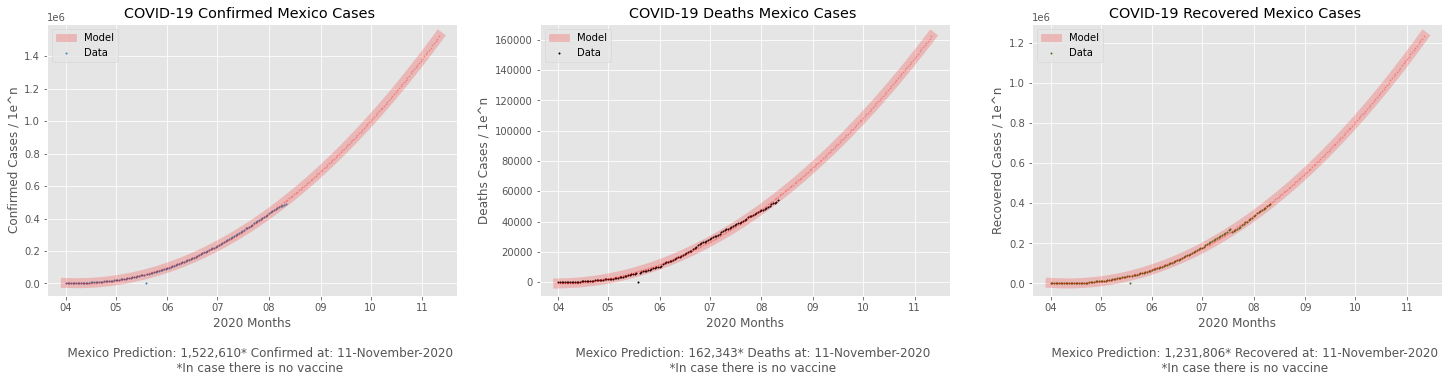

In [34]:
x = list_days[70:]
y_mx = [mx_confirmed[70:], mx_deaths[70:], mx_recovered[70:]]

x_pred = list_days_pred[70:]
y_pred_mx = [polinomial_prediction(x, y_mx[n], x_pred) for n in range(len(y_mx))]

plot_cases(x, y_mx, y_pred_mx, x_pred, labels, colors, 'Mexico')

##Mexico vs The World

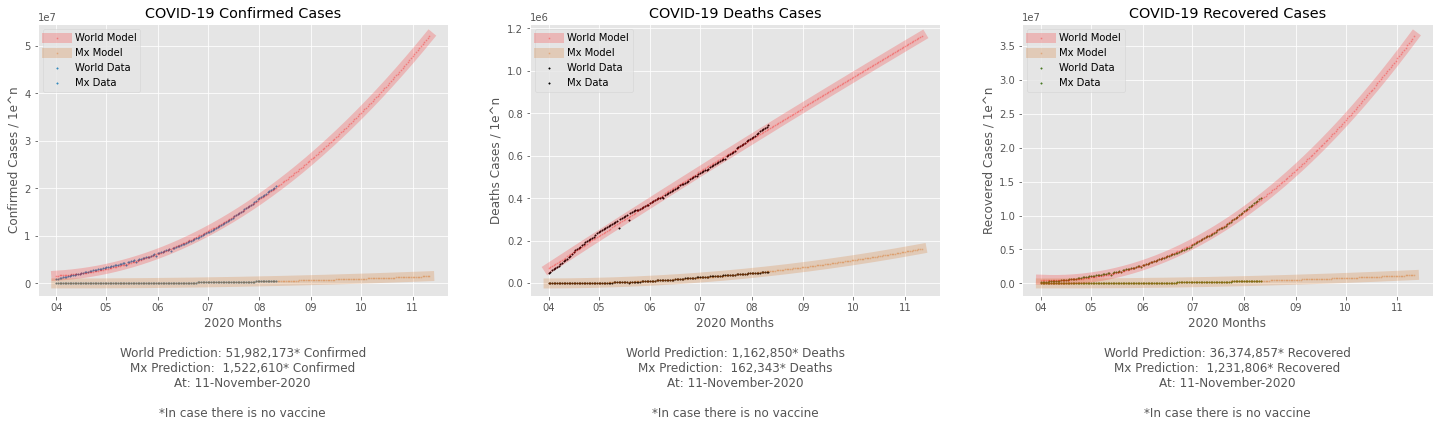

In [39]:
x = list_days[70:]
y_mx = [mx_confirmed[70:], mx_deaths[70:], mx_recovered[70:]]

x_pred = list_days_pred[70:]
ys = [sum_confirmed[70:], sum_deaths[70:], sum_recovered[70:]]
y_pred = [polinomial_prediction(x, ys[n], x_pred) for n in range(len(ys))]
y_pred_mx = [polinomial_prediction(x, y_mx[n], x_pred) for n in range(len(y_mx))]

labels = ['Confirmed', 'Deaths', 'Recovered']
mx_colors = [bmh_colors['blue'], 'k', bmh_colors['green']]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,5), sharey=False, sharex=True)
n = 0
plt.style.use('ggplot')

for ax in fig.get_axes():
    world_mld_plt = ax.plot(x_pred, y_pred[n], label='World Model',marker='o', markersize=1 , color = 'r', alpha=0.2, linewidth=10)
    mx_mdl_plt = ax.plot(x_pred, y_pred_mx[n], label='Mx Model',marker='o', markersize=1 , color = bmh_colors['orange'], alpha=0.2, linewidth=10)

    data_sctr = ax.scatter(x, ys[n], label='World Data', color = colors[n], marker='o', s=2)
    mx_sctr = ax.scatter(x, y_mx[n], label='Mx Data', color = mx_colors[n], marker='o', s=2)
    
    ax.set_ylabel(f'{labels[n]} Cases / 1e^n')
    ax.set_title(f'COVID-19 {labels[n]} Cases')

    pred_number = '{:,}'.format(int(y_pred[n][-1]))
    pred_date = datetime.strftime(x_pred[-1], '%d-%B-%Y')

    pred_number_mx = '{:,}'.format(int(y_pred_mx[n][-1]))

    txt = f'''2020 Months

World Prediction: {pred_number}* {labels[n]}
Mx Prediction:  {pred_number_mx}* {labels[n]}
At: {pred_date}

*In case there is no vaccine'''

    date_format = mdates.DateFormatter('%m')
    ax.xaxis.set_major_formatter(date_format)
    ax.set_xlabel(txt)


    n = n + 1
    
    ax.legend(loc='best')

plt.show()

#Por region

In [ ]:
countries_file = 'countries and subregions.csv'
countries_df = pd.read_csv(countries_file)

countries_list = countries_df['Country'].to_list()
subregion_list = countries_df['Sub-region'].to_list()
continent_list = countries_df['Continent'].to_list()

countries_table = {countries_list[n]:[subregion_list[n], continent_list[n]] for n in range(len(countries_list))}
#countries_table

In [ ]:
regions = [None] * (len(countries))
continents = [None] * (len(countries))
c = 0

for country in countries:
    try:
        regions[c] = countries_table[country][0]
        continents[c] = countries_table[country][1]
    except Exception as e:
        print(c, country, e)
    c += 1

df.insert(5, 'Sub-regions', regions)
df.insert(6, 'Continents', continents)

In [ ]:
#Confirmed Cases
x = df['ObservationDate']
groups = df.groupby('Sub-regions')
plt.figure(figsize=(12,6))


for name, group in groups:
    plt.scatter(group['ObservationDate'], group['Confirmed'], label=name)
# ax1.scatter(x, y1, s=1, color='b')

# plt.legend(loc='lower right')
plt.title(titles[0])
plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=2)

plt.show()

In [ ]:
#Confirmed Cases
x = df['ObservationDate']
y1 = df['Confirmed']
groups = df.groupby('Continents')

plt.style.use('ggplot')
plt.figure(figsize=(12,6))

for name, group in groups:
    plt.scatter(group['ObservationDate'], group['Confirmed'] , label=name, s=4, marker='x')

plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=2)
plt.title(titles[0])
plt.show()

Gracias a estos gráficos, podemos confirmar que 

In [ ]:
df

In [ ]:
# df_time_sum = df.groupby('ObservationDate').sum()
# sum_recovered = df_time_sum['Recovered'].to_list()

In [ ]:
def centered_len(max_len):
    def centered_string(string):
        if type(string) != 'string':
            string = str(string)
            
        rest = max_len - len(string)
        n_spaces = int(rest/2)

        string_spaces = ' ' * n_spaces
        
        centered_string = string_spaces + string + string_spaces

        if len(centered_string)<max_len:
            centered_string = ' ' + centered_string

        return centered_string
    return centered_string

In [ ]:
subregions = list(set(subregion_list))
subregions.sort()
continents = list(set(continent_list))
continents.sort()

subregions_positions = {subregions[n]:n for n in range(len(subregions))}
subregions_sum = {subregions[n]:[0, 0, 0] for n in range(len(subregions))}
# subregions_array = {subregions[n]:[[None], [None], [None]] for n in range(len(subregions))}

continents_positions = {subregions[n]:n for n in range(len(subregions))}
continents_sum = {continents[n]:[0, 0, 0] for n in range(len(continents))}
# continents_array = {continents[n]:[[None], [None], [None]] for n in range(len(continents))}

In [ ]:
def append_value_at_position(day_array, category_position, value): 
    if day_array[category_position] == None:
        empty_array = []
        day_array[category_position] = empty_array

        category_array = day_array[category_position]
        category_array.append(value)
    else:
        category_array = day_array[category_position]
        category_array.append(value)
        
    return day_array